# Ramon Lopes

- A base de dados foi processada de modo a analisar features, verificar missing data e transformar algumas features. Por exemplo, os meses foram substituídos por equivalentes numéricos, enquanto yes/no foram substituídos por 1/0 na variável de resposta. Missing data não foi encontrado.

In [69]:
import pandas as pd
import numpy as np
np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV

from scipy.stats import chi2_contingency

df = pd.read_csv('data.csv')
yes_no = {'yes': 1, 'no' : 0}

x_train, x_test = train_test_split(df, test_size=0.2, stratify=df['y'])

def print_cat(df, col_name, y_value=1):    
    strata = df[df['y']==y_value][col_name].value_counts()/df[col_name].value_counts()*100
    print(strata)
    strata.plot.barh(color='red')
    plt.show()

# Exploratory Data Analysis (EDA)

Vamos inciar a etapa EDA sobre o conjunto de treino apenas. Dessa forma, evitamos o vazamento de qualquer informação do conjunto de teste.

## Month

Nos meses 3, 10 e 12, há a maior taxa de conversão. No Brasil, há os seguintes eventos: Carnaval em fevereiro ou março, Dia das Crianças em outubro, Natal em dezembro.

1     10.127827
2     16.163222
3     53.134328
4     19.916628
5      6.792226
6      9.869452
7     12.002987
8     11.434928
10    44.970414
11    10.464704
12    47.560976
Name: month, dtype: float64


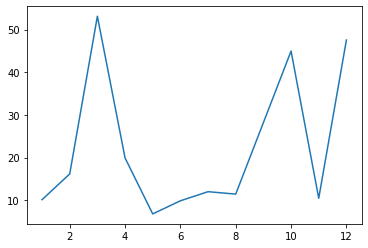

In [70]:
month1 =  x_train[x_train['y']==1]['month'].value_counts()/x_train['month'].value_counts()*100
print(month1)
month1.plot(kind='line')
plt.show()

## Dias

Nos dias 1, 10, 22 e 30, há as maiores taxas de conversão. É possível que esteja associada com datas usuais para pagamento de contas.

1     29.310345
2     12.459016
3     16.666667
4     14.951456
5     11.982882
6      9.260589
7      8.979279
8     11.187215
9     12.003454
10    21.832884
11    12.546468
12    15.978929
13    15.605929
14    10.625471
15    14.003165
16    12.823062
17     9.570725
18    10.232005
19     7.667984
20     6.856272
21     9.958506
22    17.125382
23    14.457831
24    13.939394
25    15.702479
26    11.432507
27    13.732834
28     7.421289
29     7.792208
30    16.622922
31     7.366071
Name: day, dtype: float64


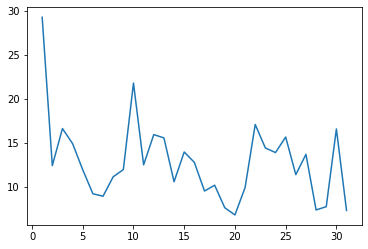

In [71]:
days1 =  x_train[x_train['y']==1]['day'].value_counts()/x_train['day'].value_counts()*100
print(days1)
days1.plot(kind='line')
plt.show()

## Age

A maioria dos clientes estão entre 20 e 60 anos

A maior taxa de conversão ocorre entre jovens e adultos até 30 anos e idosos (a partir de 60 anos).

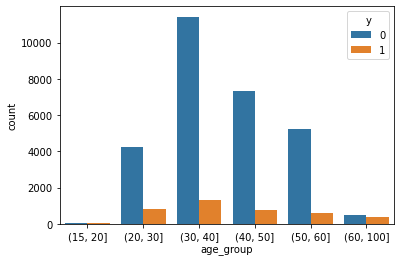

(15, 20]     39.705882
(20, 30]     15.894171
(30, 40]     10.241910
(40, 50]      9.196683
(50, 60]     10.287287
(60, 100]    43.097239
Name: age_group, dtype: float64


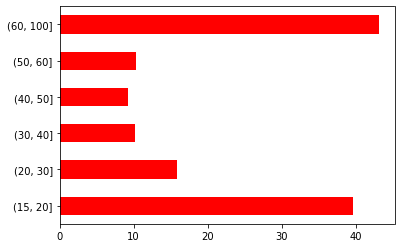

In [72]:
x_train['age_group'] = pd.cut(x_train['age'], bins=[15, 20, 30, 40, 50, 60, 100])


sns.countplot(x='age_group', hue='y', data=x_train)
plt.show()

print_cat(x_train, 'age_group')

## Jobs

Estudante e aposentado são as duas profissões com as maiores taxas de conversão. Essas duas profissões, por sua vez, são mais usuais em jovens e idosos.

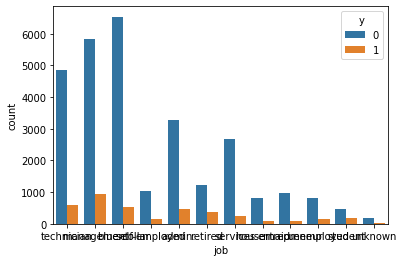

admin.           12.298604
blue-collar       7.340230
entrepreneur      8.845438
housemaid         8.970100
management       13.919198
retired          23.029174
self-employed    12.595745
services          8.673469
student          29.289941
technician       10.923754
unemployed       14.989518
unknown          11.500000
Name: job, dtype: float64


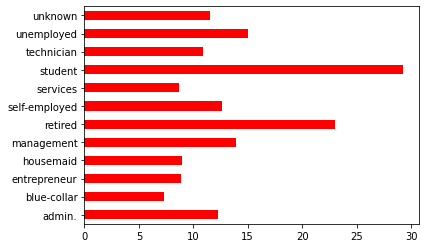

blue-collar      21.679159
management       20.834357
technician       16.760875
admin.           11.440157
services          9.031703
retired           4.949005
self-employed     3.609609
entrepreneur      3.299336
unemployed        2.930696
housemaid         2.774023
student           2.076677
unknown           0.614402
Name: job, dtype: float64


In [42]:
sns.countplot(x='job', hue='y', data=x_train)
plt.show()

print_cat(x_train, 'job')
print(x_train['job'].value_counts()/len(x_train)*100)

## Marital

Solteiros apresentam a maior taxa de conversão, seguidos por divorciados. Esses dois estados civis são mais usuais em jovens e idosos.

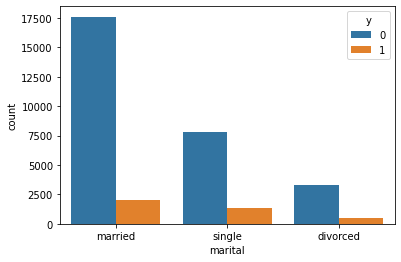

married     10.231562
single      14.914186
divorced    12.058824
Name: marital, dtype: float64


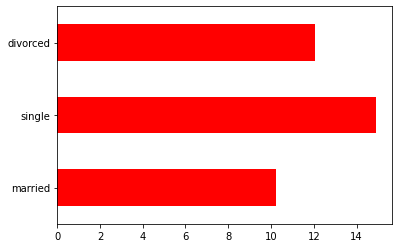

In [43]:
sns.countplot(x='marital', hue='y', data=x_train)
plt.show()

print_cat(x_train, 'marital')

## Education

Indíviduos com nível superior possuem maior taxa de conversão, seguidos por aqueles com nível médio. O resultado é razoável, pois o nível educacional da pessoa se correlaciona positivamente com o nível de conhecimento tecnológico tendo em vista que o produto está associado a débito automático.

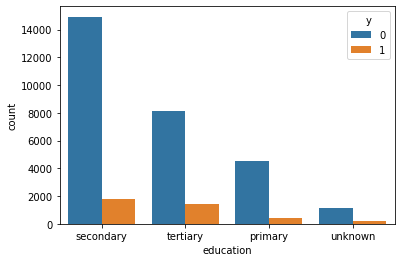

secondary    10.708303
tertiary     15.143904
primary       8.166969
unknown      14.220877
Name: education, dtype: float64


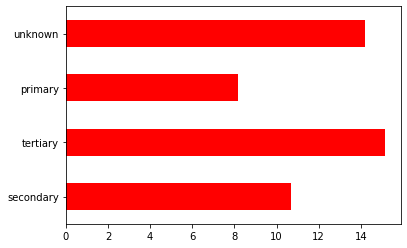

secondary    51.351683
tertiary     29.353035
primary      15.234087
unknown       4.061194
Name: education, dtype: float64


In [44]:
sns.countplot(x='education', hue='y', data=x_train)
plt.show()

print_cat(x_train, 'education')
print(x_train['education'].value_counts()/len(x_train)*100)

## Default

Indíviduos sem inandimplência tendem a ter uma maior taxa de conversão. Se um índiviuo não apresenta inadimplência, é provável que ele goze de uma boa saúde financeira e possa consumir um produto adicional de débito automático. Por outro lado, um indivíduo que apresenta inadimplência: i) pode não ter condições financeiras de consumir o produto ou ii) não veja valor em um produto adicional de débito automático. 

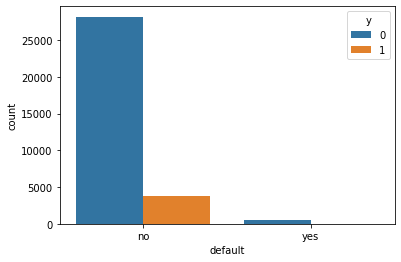

no     11.865361
yes     6.324786
Name: default, dtype: float64


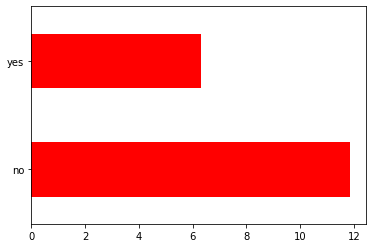

In [45]:
sns.countplot(x='default', hue='y', data=x_train)
plt.show()

print_cat(x_train, 'default')

## Housing

Clientes sem empréstimo imobiliário possuem uma maior taxa de conversão, porém vale observar que há mais clientes com empréstimo imobiliário.

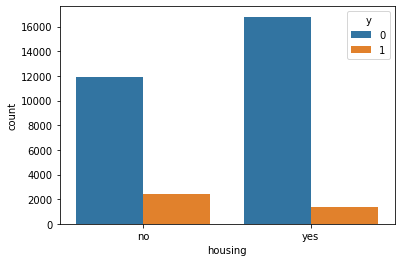

no     16.931549
yes     7.695265
Name: housing, dtype: float64


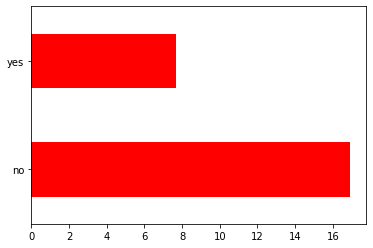

In [46]:
sns.countplot(x='housing', hue='y', data=x_train)
plt.show()

print_cat(x_train, 'housing')

# Loan


Clientes sem empréstimo pessoal possuem maior taxa de conversão.

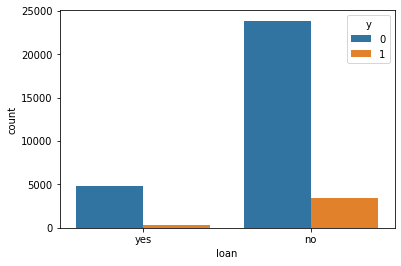

no     12.750082
yes     6.601420
Name: loan, dtype: float64


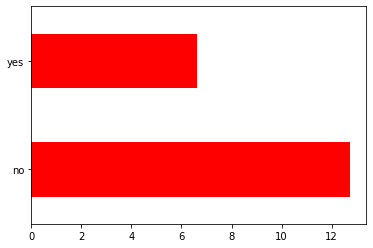

In [47]:
sns.countplot(x='loan', hue='y', data=x_train)
plt.show()

print_cat(x_train, 'loan')

## Contact

A variável aparenta não possuir poder preditivo. Por exemplo, dada a informação do meio utilizado para o contato, não aumenta nossa chance de acertar se o cliente consome o produto vendido. Claramente, o contato por meio de celular é dominante.

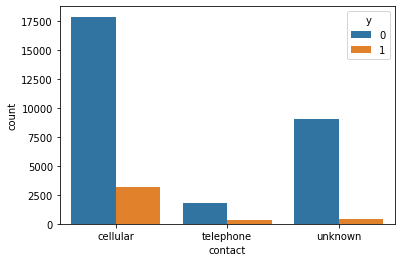

cellular     14.996200
unknown       4.035684
telephone    14.059501
Name: contact, dtype: float64


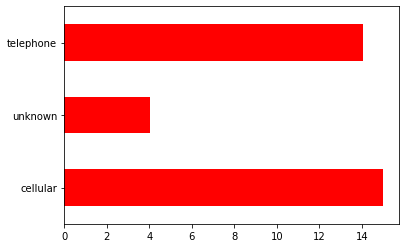

In [48]:
sns.countplot(x='contact', hue='y', data=x_train)
plt.show()

print_cat(x_train, 'contact')

## Balance

Quanto maior o saldo do cliente, maior a taxa de conversão. Com base no valor do Desvio Padrão, podemos ver que há uma grande variabilidade nos dados. Além disso, o valor máximo 98417 está a aproximadamente 32 unidades de desvio padrão da média. O valor mínimo, por sua, vez está a aproximadamente 3 unidades de desvio padrão da média. Portanto, claramente há a presença de outliers que precisam ser descartados no treino.

count    32552.000000
mean      1354.394384
std       2971.706707
min      -6847.000000
25%         73.000000
50%        449.000000
75%       1425.000000
max      98417.000000
Name: balance, dtype: float64


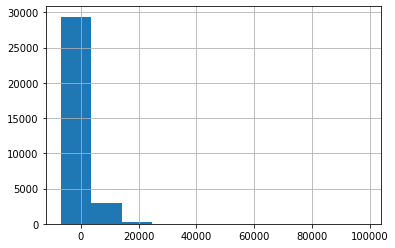

(-inf, 0.0]         7.121097
(0.0, 73.0]         8.137119
(73.0, 449.0]      11.023815
(449.0, 1425.0]    12.472325
(1425.0, inf]      16.088987
Name: balance_group, dtype: float64


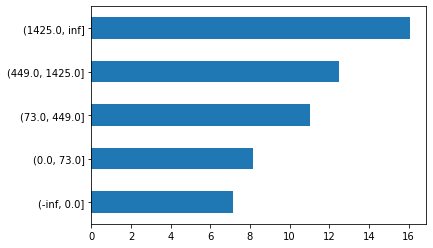

In [10]:
x_train.groupby('y').agg({'balance' : ['mean', 'median', 'min', 'max']})
print(x_train.balance.describe())

x_train.balance.hist()
plt.show()

col_name = 'balance_group'
bins = [-np.Inf] + list(x_train.balance.quantile([.1, .25, .50, .75]).values) + [np.Inf] 
x_train[col_name] =  pd.cut(x_train.balance, bins=bins)

print_cat(x_train, 'balance_group')


## Duration

O valor máximo está a aproximadamente 18 unidades de desvio padrão da média. Portanto, há outliers que precisam ser descartados no treino.

Quanto maior a duração do último contato, maior a taxa de conversão. 

count    32552.000000
mean       257.387595
std        257.281366
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64


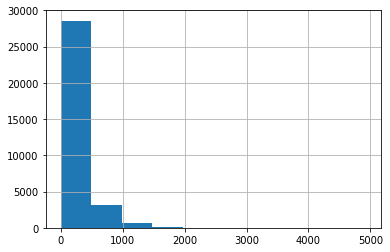

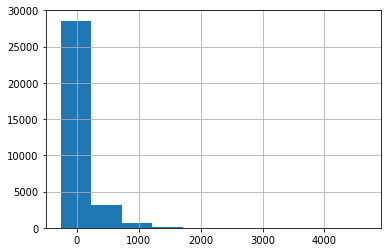

(-inf, 58.0]       0.243680
(58.0, 103.0]      1.842105
(103.0, 180.0]     5.362194
(180.0, 318.0]    11.146772
(318.0, inf]      29.541806
Name: duration_group, dtype: float64


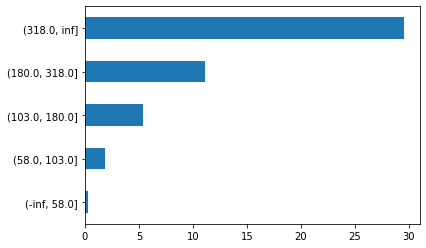

In [11]:
x_train.groupby('y').agg({'duration' : ['mean', 'median', 'min', 'max']})
print(x_train['duration'].describe())

x_train['duration'].hist()
plt.show()

(x_train['duration'] - x_train['duration'].mean()).hist()
plt.show()

col_name = 'duration_group'
bins = [-np.Inf] + list(x_train.duration.quantile([.1, .25, .50, .75]).values) + [np.Inf] 
x_train[col_name] =  pd.cut(x_train.duration, bins=bins)

print_cat(x_train, 'duration_group')

## Campaign

Quanto maior o número de contatos dentro da campanha, menor a taxa de conversão. Este dado é importante para estimar o número máximo de contatos realizados dentro da campanha, mesmo porque este número impacta os KPIs (taix como CAC)

count    32552.000000
mean         2.768616
std          3.132288
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64
(-inf, 1.0]    14.671417
(1.0, 2.0]     11.237332
(2.0, 3.0]     11.415071
(3.0, 4.0]      9.119746
(4.0, 5.0]      8.404669
(5.0, 6.0]      6.904232
(6.0, 7.0]      6.578947
(7.0, 8.0]      5.250000
(8.0, 9.0]      5.701754
(9.0, 10.0]     4.500000
(10.0, inf]     3.617270
Name: campaign_group, dtype: float64


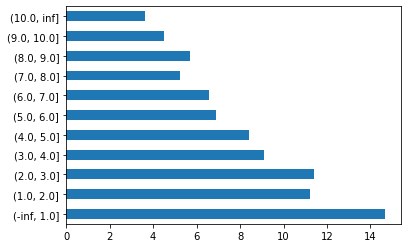

In [3]:
print(x_train['campaign'].describe())

x_train['campaign'].value_counts()

col_name = 'campaign_group'
bins = [-np.Inf] + list(range(1,11,1)) + [np.Inf]
x_train[col_name] =  pd.cut(x_train.campaign, bins=bins)

print_cat(x_train, 'campaign_group')

## PDays

A variável aparenta não possuir poder preditivo. Acredito que os bins que possuem mais de 10% sejam outliers. Essa variável merece investigação futura.

count    32552.000000
mean        40.568844
std        100.663246
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64
(-inf, 1.0]      9.070738
(1.0, 3.0]       8.695652
(3.0, 5.0]      11.111111
(5.0, 7.0]       7.692308
(7.0, 9.0]      10.714286
(9.0, 11.0]     66.666667
(11.0, 13.0]    25.000000
(13.0, 15.0]    11.111111
(15.0, 17.0]    33.333333
(17.0, 19.0]     0.000000
(19.0, inf]     23.963841
Name: pdays_group, dtype: float64


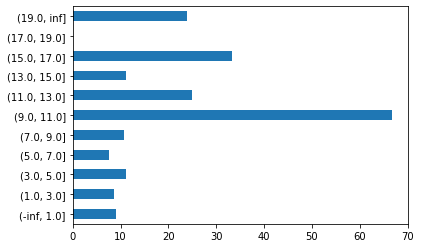

In [4]:
print(x_train['pdays'].describe())


x_train['pdays'].value_counts()

col_name = 'pdays_group'
bins = [-np.Inf] + list(range(1,20,2)) + [np.Inf]
x_train[col_name] =  pd.cut(x_train['pdays'], bins=bins)

print_cat(x_train, col_name)

## Previous

A taxa de conversão aumenta linearmente em função desta variável até 11 contatos realizados. Portanto, esta variável parece ter poder preditivo. O valor máximo está a aproximadamente 111 unidades de desvio padrão da média.  Portanto, há outliers que precisam ser descartados no treino.

count    32552.000000
mean         0.589242
std          2.476809
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64
(-inf, 1.0]      9.946472
(1.0, 3.0]      23.393316
(3.0, 5.0]      26.439483
(5.0, 7.0]      28.840970
(7.0, 9.0]      31.818182
(9.0, 11.0]     32.967033
(11.0, 13.0]    25.000000
(13.0, 15.0]    14.285714
(15.0, 17.0]    10.526316
(17.0, 19.0]    16.666667
(19.0, inf]     14.285714
Name: previous_group, dtype: float64


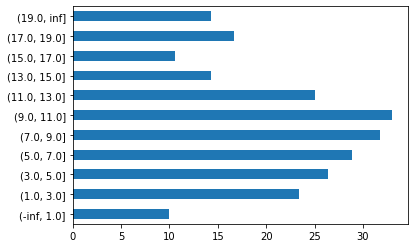

In [5]:
print(x_train['previous'].describe())

col_name = 'previous_group'
bins = [-np.Inf] + list(range(1,20,2)) + [np.Inf]
x_train[col_name] =  pd.cut(x_train['previous'], bins=bins)
print_cat(x_train, col_name)

## poutcome

Dentre todos os clientes para os quais houve sucesso na campanha anterior, há uma chance de 67% de o cliente consumir o produto nesta campanha.

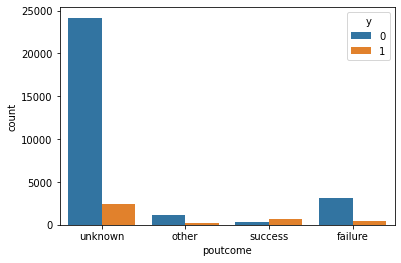

failure    12.957187
other      17.669173
success    65.560538
unknown     9.055681
Name: poutcome, dtype: float64


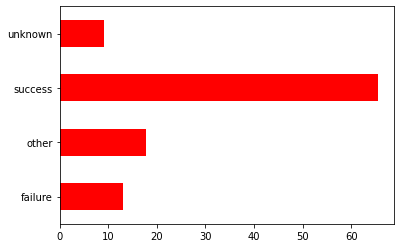

In [51]:
sns.countplot(x='poutcome', hue='y', data=x_train)
plt.show()

print_cat(x_train, 'poutcome')

## Interação entre Contact e Age

É razoável supor que jovens utilizem mais celular comparado a idosos. Essa suposição pode ser constatada pela análise pela tabela de contingência abaixo que considera apenas os clientes que comprou o produto. É possível constatar que para todas as faixas de idade, o celular é o meio de contato mais efetivo. Contudo, observa-se que, à medida que a idade aumenta, a taxa de conversão obtida pelo telefone aumenta enquanto aquela alcançada pelo ceular dimiui. Portanto, realizar campanhas de venda por telefone para clientes a partir de 60 anos.

Observação: vale ressaltar que a interação entre outros pares de variáveis foi analisado, mas só reportamos este par. Como resultado das análises, nenhum padrão foi encontrado entre pares de variáveis numéricas.

In [6]:
print(x_train['contact'].value_counts())
idx = x_train['y']==1
pd.crosstab(x_train[idx].age_group, x_train[idx].contact, normalize='index')

cellular     21052
unknown       9416
telephone     2084
Name: contact, dtype: int64


contact,cellular,telephone,unknown
age_group,,,
"(15, 20]",0.925926,0.037037,0.037037
"(20, 30]",0.858573,0.041302,0.100125
"(30, 40]",0.842791,0.039110,0.118098
"(40, 50]",0.820996,0.063257,0.115747
"(50, 60]",0.809365,0.091973,0.098662
"(60, 100]",0.704735,0.295265,0.000000


## Outras interações

- A interação entre education e balance não traz informações relevantes além de que pessoas com nível superior tendem a ter um saldo maior em conta.

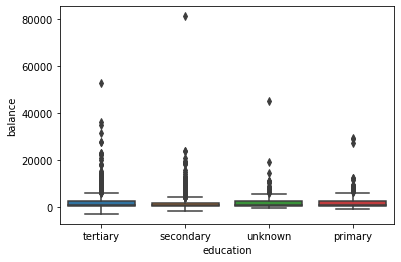

In [79]:
sns.boxplot(x='education', y='balance', data=x_train[x_train['y']==1])



- A interação entre grupo de idade e duração do último contato nos traz descobertas: jovens até 30 anos e idosos são os dois grupos com maior taxa de conversão, porém são os grupos com menor duração no último contato.

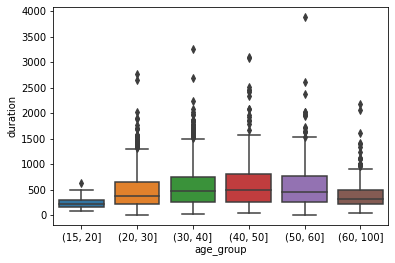

In [78]:
sns.boxplot(x='age_group', y='duration', data=x_train[x_train['y']==1])


- A interação entre grupo de idade e o trabalho nos traz algumas informações úteis par segmentação de clientes. Por exemplo, entre os jovens até 30 anos, as profissões mais comuns são aquelas mais comuns. Campanhas de marketing podem se desenvolvidas explorando esses perfis

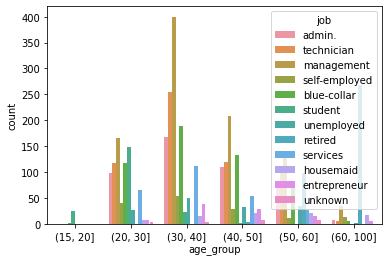

In [84]:
sns.countplot(x='age_group', hue='job', data=x_train[x_train['y']==1])

- A interação entre sucesso anterior e outras variáveis nos mostra que, diferentemente da campanha atual, a campanha anterior obteve maior sucesso entre:
    1. adultos na faixa de idade (30,40].
    2. profissões como management e technician
    3. estado civil casado

In [98]:
pd.crosstab(x_train.age_group, x_train.poutcome, normalize='columns')



poutcome,failure,other,success,unknown
age_group,,,,
"(15, 20]",0.001985,0.003759,0.007175,0.001806
"(20, 30]",0.129005,0.191729,0.191928,0.154364
"(30, 40]",0.443436,0.406015,0.330942,0.385967
"(40, 50]",0.229090,0.227820,0.184753,0.254402
"(50, 60]",0.161894,0.126316,0.150673,0.184575
"(60, 100]",0.034590,0.044361,0.134529,0.018886


In [99]:
pd.crosstab(x_train.job, x_train.poutcome, normalize='columns')

poutcome,failure,other,success,unknown
job,,,,
admin.,0.127020,0.124812,0.132735,0.111437
blue-collar,0.220017,0.222556,0.103139,0.220843
entrepreneur,0.035441,0.024060,0.014350,0.033898
housemaid,0.020130,0.016541,0.023318,0.029496
management,0.213212,0.200000,0.250224,0.206358
retired,0.048200,0.050376,0.116592,0.046802
self-employed,0.035724,0.035338,0.036771,0.036155
services,0.090729,0.084962,0.054709,0.092024
student,0.023249,0.046617,0.057399,0.017607


In [102]:
pd.crosstab(x_train.marital, x_train.poutcome, normalize='columns')

poutcome,failure,other,success,unknown
marital,,,,
divorced,0.111710,0.121805,0.104036,0.115425
married,0.608733,0.538346,0.552466,0.606734
single,0.279558,0.339850,0.343498,0.277840


In [106]:
pd.crosstab(x_train.education, x_train.poutcome, normalize='columns')

poutcome,failure,other,success,unknown
education,,,,
primary,0.134675,0.139850,0.089686,0.157938
secondary,0.526793,0.539850,0.452018,0.513017
tertiary,0.302807,0.284211,0.399103,0.288337
unknown,0.035724,0.036090,0.059193,0.040707


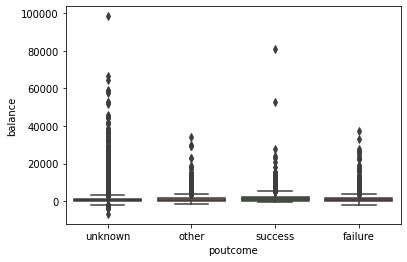

In [107]:
sns.boxplot(x='poutcome', y='balance', data=x_train)


# Feature Engineering

Após a etapa EDA, vamos iniciar o processo de construção de features.

A feature age será agrupada de modo a agrupar jovens, jovens adultos, adultos e idosos.

In [55]:
df['loan'] = df['loan'].map(yes_no).astype('uint8')
df['default'] = df['default'].map(yes_no).astype('uint8')
df['housing'] = df['housing'].map(yes_no).astype('uint8')


# age
df['age_group'] = pd.cut(df['age'], bins=[15, 20, 30, 60, 100])

A feature previous será transformada em uma variável binária indicando se está compreendida no intervalo [1,13], uma vez que há a tendência de crescimento na taxa de conversão até aquele valor.

In [56]:
idx = (df['previous'] > 0) & (df['previous'] <= 13)
df.loc[idx, 'previous'] = 1
df.loc[~idx, 'previous'] = 0

Dentre os possíveis valores possíveis para a feature job, manteremos: ['student', 'retired', 'unemployed', 'management', 'admin.']. Os demais valores serão substituídos por 'other_job'. 

In [57]:
# job 
job_strata = ['student', 'retired', 'unemployed', 'management', 'admin.']
idx = df['job'].isin(job_strata)
df.loc[~idx, 'job'] = 'other_job'

- Vamos transformar a variável education em uma variável ordinal de modo que 'tertiary' assuma o maior valor enquanto unkown assumirá valor 0. 

- As features job, martial serão converidas em variáveis dummy, uma vez que algumas bibliotecas não permitem trabalhar com features categóricas.

In [58]:
education_values = {'tertiary': 3, 'secondary': 2, 'primary' : 1, 'unknown' : 0}

df['education'] = df['education'].map(education_values).astype('uint8')

dummy_cols = ['job', 'marital']
df = pd.get_dummies(df, columns=dummy_cols, prefix='is')

- Vamos tranformar a variável poutcome em uma variável binária indicando se houve sucesso na campanha anterior com o cliente em questão.

- Por fim, descartamos algumas features irrelavantes e geramos a base final.

In [59]:
idx = df['poutcome'] == 'success'
df.loc[idx, 'poutcome'] = 1
df.loc[~idx, 'poutcome'] = 0

campaign_columns_to_drop = ['pdays']
customer_to_drop = ['contact']
columns_to_drop = customer_to_drop+campaign_columns_to_drop
df.drop(columns=columns_to_drop, inplace=True)

# Modelos

## Métricas de Avaliação

Uma vez que o dataset é desbalanceado, vamos adotar Precision, Recall e F1 score como métricas de desempenho; mais informações podem ser encontradas neste [link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Sucintamente, Precision avalia a taxa de acerto dentre todos aqueles os clientes cuja previsão é de compra (ŷ=1), enquanto Recall, por sua vez, avalia a taxa de acerto dentre todos os clientes que de fato efetuam a compra (y=1). Finalmente, F1 é uma métrica em função de Precision e Recall. No código, avaliamos também Accuracy, que se resume a Jaccard num problema de classificação com duas classes, e Balanced Accuracy.

A seguir, há duas funções com o objetivo de:
- remover outliers: supondo uma distribuição Normal dos dados, aproximadamente 95% dos dados reside dentro de duas unidades de desvio padrão, vamos, então, adotar esse critério para a remoção de outliers. 
- particionar o dataset em treino, validação e teste de forma estratificada
- computar as métricas adotadas

Vale ressaltar que todos os resultados foram obtidos por através do método Train-Test-Split, no qual 80% da base é utilizada para treino, 10% para validação e 10% para teste. Os resultados apresentados são aqueles obtidos no conjunto de teste. O conjunto de validação, por sua vez, foi utilizado apenas para calibração de hiperparâmetros, processo este realizado por meio de Grid Search.

In [60]:
def remove_outliers(df, y, column):
    #remove outliers cujo valor absoluto do z escore seja maior que 2    
    idxs = (np.abs(stats.zscore(df[column])) <= 2)
    return df[idxs], y[idxs]


def split(df, valid=True):
    x_train, x_test = train_test_split(df, test_size=0.2, stratify=df['y'])
    if valid:
        x_test, x_val = train_test_split(x_test, test_size=0.5, stratify=x_test['y'])
        y_val = x_val['y']

    y_train = x_train['y']
    y_test = x_test['y']

    x_train.drop(columns=['y'], inplace=True)
    x_test.drop(columns=['y'], inplace=True)

    if valid:
        x_val.drop(columns=['y'], inplace=True)
        return x_train, x_val, x_test, y_train, y_val, y_test
    else:
        return x_train, x_test, y_train, y_test

def print_metrics(y_true, y_pred):
    print('Accuracy: %.2f'%(accuracy_score(y_true, y_pred)))
    print('Balanced Accuracy: %.2f'%(balanced_accuracy_score(y_true, y_pred)))
    print('Precision: %.2f'%(precision_score(y_test, y_pred)))
    print('Recall: %.2f'%(recall_score(y_true, y_pred)))
    print('F1: %.2f'%(f1_score(y_true, y_pred)))

## Baseline

### Weakest Baseline: Moda

Este classificador prevê a classe mais frequente do conjunto de treino como classficação, no caso a classe 0. Como esperado, este classificador apresenta Recall igual a 0.

| Método | Precision | Recall | F1 |
| --- | --- | --- | ---  |
| Moda | 0.0 | 0.0 | 0.0 |

In [61]:
df_regression = pd.get_dummies(df, columns=['age_group'], prefix='is').drop(columns=['age'])

x_train, x_test, y_train, y_test = split(df_regression, False)

y_pred = np.repeat(0, len(y_test))

print_metrics(y_test, y_pred)

Accuracy: 0.88
Balanced Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1: 0.00


### Weakest Baseline: Aleatório

Este classificador prevê a classe aleatoriamente cujo valor predito é uma amostra de uma distribuição Bernoulli com probabilidade de sucesso igual a proporção de instâncias com y=0 no treino.

| Método |  Preicsion | Recall | F1 |
| --- | --- | --- | --- | 
| Aleatório | 0.12 | 0.12 | 0.12 |

In [12]:
p = (y_train.value_counts()/len(y_train)).values[1]
y_pred = np.random.binomial(1, p, len(y_test))
print_metrics(y_test, y_pred)

Accuracy: 0.79
Balanced Accuracy: 0.50
Precision: 0.12
Recall: 0.12
F1: 0.12


### Regressão Logística (RL)



Diante de uma base de dados desbalanceada, atribuímos pesos às instâncias para compensar o desbalanceamento; outras estratégias são encontradas na literatura. Utilizamos regularização L2 para prevenir overfitting. A melhor configuração dos hiperparâmetros foi determinada por meio do Grid Search nas conjuntos treino e validação.

Após a calibração dos hiperparâmetros, obtemos uma configuração em que uma instância da classe em minoria (y=1) possui um peso equivalente a cinco vezes àquele da classe em maioria (y=1). O fator de regularização encontrado foi igual a 0.1.

O resultado obtido no teste é apreentado nesta tabela:

| Método | Precision | Recall | F1 |
| --- |  --- | --- | --- |
| RL | 0.44 | 0.64 | 0.52 |

Como o conjunto de dados é desbalanceado, a métrica Precision apresenta um valor igual a 0.44, significando que o classificador prevê corretamente 44% dentre todos aqueles classificados como clientes que comprariam o produto no teste (ŷ=1). A métrica Recall, por sua vez, apresenta um valor apresenta igual a 0.64, indicando que o classificador prevê corretamente 64% dentre todos clientes que comprariam o produto no teste (y=0). Desse modo, concluímos que o modelo, como resultado da base de treinamento, possui uma taxa de elevada de falso positivo.

In [62]:
df_regression = pd.get_dummies(df, columns=['age_group'], prefix='is').drop(columns=['age'])

x_train, x_test, y_train, y_test = split(df_regression, False)

x_train_columns = x_train.columns

print(len(x_train))
x_train, y_train = remove_outliers(x_train, y_train, 'duration')
x_train, y_train = remove_outliers(x_train, y_train, 'balance')
x_train, y_train = remove_outliers(x_train, y_train, 'previous')
print(len(x_train))

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression

weights = [{0:1, 1:i} for i in range(2,11,1)]
reg = [1e-8, 1-6, 1e-4, 1e-2, 1e-1]
grid={'C': reg, 'class_weight' : weights}



lr_cv = GridSearchCV(LogisticRegression(max_iter=1000, C=1e-6), grid, scoring='f1', cv=2, n_jobs=3, verbose=1)
lr_cv.fit(x_train,y_train)

32552
24732
Fitting 2 folds for each of 45 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  85 out of  90 | elapsed:    5.8s remaining:    0.3s
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:    6.0s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1e-06, class_weight=None,
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [1e-08, -5, 0.0001, 0.01, 0.1],
                         'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}, {0: 1, 1: 5},
                                          {0: 1, 1: 6}, {0: 1, 1: 7},
                                          {0: 1, 1: 8}, {0: 1, 1: 9},
          

Best Params:  {'C': 0.1, 'class_weight': {0: 1, 1: 5}}
F1: 0.39
AUC: 0.87


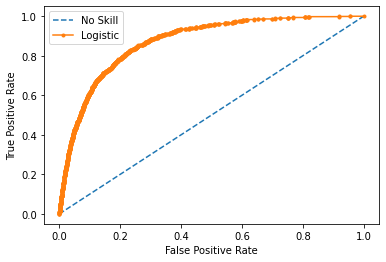

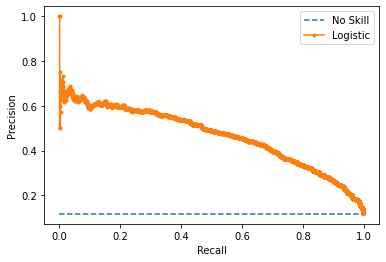

AUC Recall Precision: 0.47
Accuracy: 0.86
Balanced Accuracy: 0.77
Precision: 0.44
Recall: 0.64
F1: 0.52


In [63]:
print('Best Params: ',lr_cv.best_params_)

print('F1: %.2f'%(lr_cv.best_score_))

y_pred_scores = lr_cv.best_estimator_.predict_proba(x_test)[::,1]
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
print('AUC: %.2f'%(roc_auc_score(y_test, y_pred_scores)))

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_scores)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_scores)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print('AUC Recall Precision: %.2f'%(auc(lr_recall, lr_precision)))

y_pred = lr_cv.predict(x_test)
print_metrics(y_test, y_pred)

## Análise de Feature Importance

A análise de feature importance abaixo nos indica as features mais significativas para aumentar a chance de compra por um cliente (ŷ=1). Dentre aquelas, vamos nos debruçar sobre algumas features ordenadas por importância:

- duração (duration)
- saldo (balance)
- is_(60, 100]: feature obtida na etapa de feature engineering que indica se a idade é acima de 60 anos 
- poutcome: feature obtida na etapa de feature engineering que indica se houve sucesso com o cliente em campanha anterior
- education: feature obtida na etapa de feature engineering que atribui valor valor ordinal com base no nível de escolaridade
- is_student: feature obtida na etapa de feature engineering que atribui valor 1 a clientes que sejam estudante.
- is_(15, 20]: feature obtida na etapa de feature engineering que indica se a idade está no intervalo (15, 20]

O resultado encontrado está coerente com os achados na análise exploratória:

- Quanto a maiora duração (duration), maior a taxa de conversão
- Quanto maior o saldo, maior a taxa de conversão
- Idosos e jovens possuem maior taxa de conversão
- Há uma tendência de recorrência, de modo que o sucesso em uma campanha anterior aumenta a chance de sucesso na campanha atual. Apesar disso, evidências foram encontradas na etapa EDA de que há uma diferença entre os perfis dos clientes convertidos nas duas campanhas.
- A chance de venda é diretamente proporcional ao nível de escolaridade
- Ser estudante aumenta a chance de venda.

Feature: 0, Score: 0.71980
Feature: 1, Score: -0.20164
Feature: 2, Score: 1.51159
Feature: 3, Score: -1.05571
Feature: 4, Score: -0.64966
Feature: 5, Score: -0.39879
Feature: 6, Score: -0.51517
Feature: 7, Score: 4.95921
Feature: 8, Score: -2.25795
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.87604
Feature: 11, Score: 0.08177
Feature: 12, Score: -0.07511
Feature: 13, Score: -0.33430
Feature: 14, Score: -0.24173
Feature: 15, Score: 0.64043
Feature: 16, Score: -0.07299
Feature: 17, Score: -0.02039
Feature: 18, Score: -0.15762
Feature: 19, Score: 0.17609
Feature: 20, Score: 0.53913
Feature: 21, Score: -0.63920
Feature: 22, Score: -1.08408
Feature: 23, Score: 1.18223


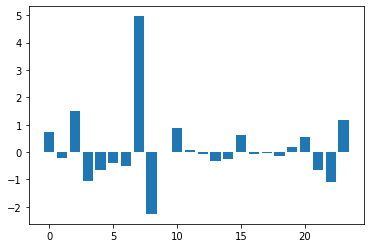

Features em ordem de importancia:
Index(['duration', 'balance', 'is_(60, 100]', 'poutcome', 'education',
       'is_student', 'is_(15, 20]', 'is_single', 'is_admin.', 'previous',
       'is_divorced', 'is_unemployed', 'is_management', 'is_married',
       'default', 'is_retired', 'is_other_job', 'day', 'month', 'is_(20, 30]',
       'loan', 'housing', 'is_(30, 60]', 'campaign'],
      dtype='object')


In [64]:
importance = lr_cv.best_estimator_.coef_[0]

for i,v in enumerate(importance):
   print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

idxs = np.argsort(-importance)

print('Features em ordem de importancia:')
print(x_train_columns[idxs])

# Conclusão

A tabela abaixo apresenta unificadamente o resultado dos três métodos avaliados. Em negrito, apresentamos o melhor resultado de cada métrica avaliada. O método de RL apresentou resultados superiores aos métodos comparados em todas as métricas. A saber, o método de RL apresentou resultados pelo menos 366% superiores comparados ao Baseline Aleatório em todas as métricas.

Diante do cenário, a obtenção de um Recall igual 0.64 nos indica  que conseguimos prever no conjunto de teste 64% daqueles clientes que comprariam o produto. Desse modo, o método de RL mais uma vez se mostrou como um forte baseline para métodos mais complexos e custosos.


| Método |  Precision | Recall | F1 |
| --- | --- | --- | --- | 
| Moda | 0.00 | 0.00 | 0.00 |
| Aleatório |  0.12 | 0.12 | 0.12 |
| RL | (+366%) **0.44** | (+533%) **0.64** | (+433%) **0.52** |

# Possibilidades de Melhorias

Visualizamos inúmeras possibilidades de melhorias:

- Investigação de outros modelos tais como Support Vector Machine, Random Forest, Gradient Boosting
- Investigação de estratégias estatísticas: Resampling (oversampling, undersampling), Geração de instâncias sintéticas
    

# Insights e Plano de Ação

Com base na EDA e nas features mais importantes do nosso modelo, podemos sugerir que campanhas de marketing sejam direcionadas *preferencialmente* para clientes com o seguinte perfil:

- Idade: abaixo de 30  ou acima de 60 anos,
- Profissão: primeiramente, estudante; aposentado, posteriormente,
- Estado civil: solteiro ou divorciado,
- Escolaridade: primeiramente, nível superior; ensimo médio, posteriormente; fundamental, por fim.
- Possui Inadimplência: não
- Possui Empréstimo Imobiliário: não
- Possui Empréstimo Pesoal: não
- Saldo em Conta: posittivo e crescente
- Sucesso em campanha anterior: sim; os dados mostram que há uma tendência à recorrência ou fidelização.

Este perfil pode ser útil para criar uma *persona* e entender melhor suas dores de modo a prospectar leads e aumentar a taxa de conversão de clientes, reduzindo também o CAC (Customer Acquisition Cost). Além disso, é possível direcionar campanhas com maior taxa de sucesso para clientes já fidelizados.

Essa amostra de dados sugere que as campanhas sejam realizadas observando as seguintes questões para aumentar a taxa de conversão:
- Dias do mês: em torno dos dias 1, 10, 22 e 30
- Mês: Janeiro, Outubro e Dezembro
- Forma de contato: celular prioritariamente, porém sugere-se o uso de telefone em vez de celular para clientes a partir de 60 anos.


Por fim, a amostra de dados sugere que nas campanhas:
- O número máximo de contatos por cliente dentro da campanha deve ser no máximo 3.
- Com base na observação acima, deve-se investir esforços naqueles clientes que permaneceram mais tempo durante o último o contato
- Deve-se investir esforços naqueles clientes que, na última campanha, foram contatados até 13 vezes